In [20]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
df = pd.read_stata("/home/jovyan/Desktop/quarto_website1/HW1/karlan_list_2007.dta")
df['ratio1'] = (df['ratio'] == 1).astype(int)

In [22]:
list(df.columns)

['treatment',
 'control',
 'ratio',
 'ratio2',
 'ratio3',
 'size',
 'size25',
 'size50',
 'size100',
 'sizeno',
 'ask',
 'askd1',
 'askd2',
 'askd3',
 'ask1',
 'ask2',
 'ask3',
 'amount',
 'gave',
 'amountchange',
 'hpa',
 'ltmedmra',
 'freq',
 'years',
 'year5',
 'mrm2',
 'dormant',
 'female',
 'couple',
 'state50one',
 'nonlit',
 'cases',
 'statecnt',
 'stateresponse',
 'stateresponset',
 'stateresponsec',
 'stateresponsetminc',
 'perbush',
 'close25',
 'red0',
 'blue0',
 'redcty',
 'bluecty',
 'pwhite',
 'pblack',
 'page18_39',
 'ave_hh_sz',
 'median_hhincome',
 'powner',
 'psch_atlstba',
 'pop_propurban',
 'ratio1']

In [23]:
df

,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban,ratio1
0,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.446493,0.527769,0.317591,2.10,28517.0,0.499807,0.324528,1.000000,0
1,0,1,Control,0,0,Control,0,0,0,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1,0,1,0,0,"$100,000",0,0,1,0,...,1.0,0.935706,0.011948,0.276128,2.48,51175.0,0.721941,0.192668,1.000000,1
3,1,0,1,0,0,Unstated,0,0,0,1,...,0.0,0.888331,0.010760,0.279412,2.65,79269.0,0.920431,0.412142,1.000000,1
4,1,0,1,0,0,"$50,000",0,1,0,0,...,1.0,0.759014,0.127421,0.442389,1.85,40908.0,0.416072,0.439965,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50078,1,0,1,0,0,"$25,000",1,0,0,0,...,1.0,0.872797,0.089959,0.257265,2.13,45047.0,0.771316,0.263744,1.000000,1
50079,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.688262,0.108889,0.288792,2.67,74655.0,0.741931,0.586466,1.000000,0
50080,0,1,Control,0,0,Control,0,0,0,0,...,0.0,0.900000,0.021311,0.178689,2.36,26667.0,0.778689,0.107930,0.000000,0
50081,1,0,3,0,1,Unstated,0,0,0,1,...,0.0,0.917206,0.008257,0.225619,2.57,39530.0,0.733988,0.184768,0.634903,0


In [24]:
import numpy as np

def welch_t_test(x, y):
    # Drop missing values
    x = x.dropna()
    y = y.dropna()

    # Sample sizes
    n_x = len(x)
    n_y = len(y)

    # Sample means
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Sample variances
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)

    # Welch's t-statistic
    numerator = mean_x - mean_y
    denominator = np.sqrt((var_x / n_x) + (var_y / n_y))

    if denominator == 0:
        return np.nan

    t_stat = numerator / denominator
    return t_stat


In [25]:

covariates = [
    'mrm2', 'hpa', 'years', 'female', 'couple',
    'pwhite', 'pblack', 'ave_hh_sz', 'median_hhincome'
]

for var in covariates:
    print(f"\n--- Manual Welch t-test for {var} ---")
    x = df[df['treatment'] == 1][var]
    y = df[df['treatment'] == 0][var]
    t_stat = welch_t_test(x, y)
    print(f"t = {t_stat:.4f}")
    # Linear regression
    model = smf.ols(f"{var} ~ treatment", data=df).fit()
    coef = model.params['treatment']
    p = model.pvalues['treatment']
    print(f"Regression: coef = {coef:.3f}, p = {p:.4f}")



--- Manual Welch t-test for mrm2 ---
t = 0.1195
Regression: coef = 0.014, p = 0.9049

--- Manual Welch t-test for hpa ---
t = 0.9704
Regression: coef = 0.637, p = 0.3451

--- Manual Welch t-test for years ---
t = -1.0909
Regression: coef = -0.058, p = 0.2700

--- Manual Welch t-test for female ---
t = -1.7535
Regression: coef = -0.008, p = 0.0787

--- Manual Welch t-test for couple ---
t = -0.5823
Regression: coef = -0.002, p = 0.5594

--- Manual Welch t-test for pwhite ---
t = -0.5590
Regression: coef = -0.001, p = 0.5753

--- Manual Welch t-test for pblack ---
t = 0.0975
Regression: coef = 0.000, p = 0.9219

--- Manual Welch t-test for ave_hh_sz ---
t = 0.8234
Regression: coef = 0.003, p = 0.4098

--- Manual Welch t-test for median_hhincome ---
t = -0.7433
Regression: coef = -157.925, p = 0.4583


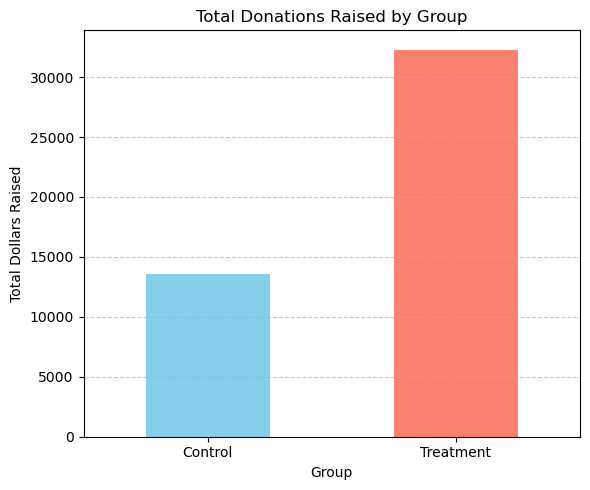

In [26]:
import matplotlib.pyplot as plt



group_totals = df.groupby('treatment')['amount'].sum()

group_totals.index = ['Control', 'Treatment']

plt.figure(figsize=(6, 5))
group_totals.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Total Donations Raised by Group')
plt.ylabel('Total Dollars Raised')
plt.xlabel('Group')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [27]:
from scipy.stats import ttest_ind



control_gave = df[df['treatment'] == 0]['gave'].dropna()
treatment_gave = df[df['treatment'] == 1]['gave'].dropna()

t_stat, p_val = ttest_ind(treatment_gave, control_gave, equal_var=False)
print(f"T-test: t = {t_stat:.3f}, p = {p_val:.4f}")

T-test: t = 3.209, p = 0.0013


In [28]:
import statsmodels.formula.api as smf

model = smf.ols('gave ~ treatment', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.618
Date:                Wed, 23 Apr 2025   Prob (F-statistic):            0.00193
Time:                        17:04:45   Log-Likelihood:                 26630.
No. Observations:               50083   AIC:                        -5.326e+04
Df Residuals:                   50081   BIC:                        -5.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0179      0.001     16.225      0.0

In [29]:
import statsmodels.api as sm

df['intercept'] = 1  # probit model requires intercept manually
probit_model = sm.Probit(df['gave'], df[['intercept', 'treatment']]).fit()
print(probit_model.summary())


Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50081
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:               0.0009783
Time:                        17:04:45   Log-Likelihood:                -5030.5
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                  0.001696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1001      0.023    -90.073      0.000      -2.146      -2.054
treatment      0.0868      0.

In [30]:
from scipy.stats import ttest_ind

# Filter groups
r1 = df[df['ratio'] == 1]['gave']
r2 = df[df['ratio2'] == 1]['gave']
r3 = df[df['ratio3'] == 1]['gave']

# T-tests
print("T-test: 2:1 vs 1:1")
print(ttest_ind(r2, r1, equal_var=False))

print("\nT-test: 3:1 vs 1:1")
print(ttest_ind(r3, r1, equal_var=False))

print("\nT-test: 3:1 vs 2:1")
print(ttest_ind(r3, r2, equal_var=False))


T-test: 2:1 vs 1:1
TtestResult(statistic=0.965048975142932, pvalue=0.33453078237183076, df=22225.07770983836)

T-test: 3:1 vs 1:1
TtestResult(statistic=1.0150174470156275, pvalue=0.31010856527625774, df=22215.0529778684)

T-test: 3:1 vs 2:1
TtestResult(statistic=0.05011581369764474, pvalue=0.9600305476940865, df=22260.84918918778)


In [31]:
import statsmodels.formula.api as smf

model = smf.ols('gave ~ ratio1 + ratio2 + ratio3', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.665
Date:                Wed, 23 Apr 2025   Prob (F-statistic):             0.0118
Time:                        17:04:45   Log-Likelihood:                 26630.
No. Observations:               50083   AIC:                        -5.325e+04
Df Residuals:                   50079   BIC:                        -5.322e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0179      0.001     16.225      0.0

In [32]:
coef_r2 = model.params.get('ratio2', 0)
coef_r3 = model.params.get('ratio3', 0)
print(f"\nDifference 2:1 vs 1:1: {coef_r2:.4f}")
print(f"Difference 3:1 vs 1:1: {coef_r3:.4f}")
print(f"Difference 3:1 vs 2:1: {coef_r3 - coef_r2:.4f}")



Difference 2:1 vs 1:1: 0.0048
Difference 3:1 vs 1:1: 0.0049
Difference 3:1 vs 2:1: 0.0001


In [33]:
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf



control_amt = df[df['treatment'] == 0]['amount']
treatment_amt = df[df['treatment'] == 1]['amount']
t_stat, p_val = ttest_ind(treatment_amt, control_amt, equal_var=False)
print(f"T-test (all data): t = {t_stat:.3f}, p = {p_val:.4f}")

# Bivariate regression
model = smf.ols('amount ~ treatment', data=df).fit()
print(model.summary())


T-test (all data): t = 1.918, p = 0.0551
                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.461
Date:                Wed, 23 Apr 2025   Prob (F-statistic):             0.0628
Time:                        17:04:45   Log-Likelihood:            -1.7946e+05
No. Observations:               50083   AIC:                         3.589e+05
Df Residuals:                   50081   BIC:                         3.589e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  

In [34]:


df_donors = df[df['amount'] > 0]

c_amt = df_donors[df_donors['treatment'] == 0]['amount']
t_amt = df_donors[df_donors['treatment'] == 1]['amount']
t_stat, p_val = ttest_ind(t_amt, c_amt, equal_var=False)
print(f"T-test (donors only): t = {t_stat:.3f}, p = {p_val:.4f}")

model_donors = smf.ols('amount ~ treatment', data=df_donors).fit()
print(model_donors.summary())


T-test (donors only): t = -0.585, p = 0.5590
                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3374
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.561
Time:                        17:04:45   Log-Likelihood:                -5326.8
No. Observations:                1034   AIC:                         1.066e+04
Df Residuals:                    1032   BIC:                         1.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

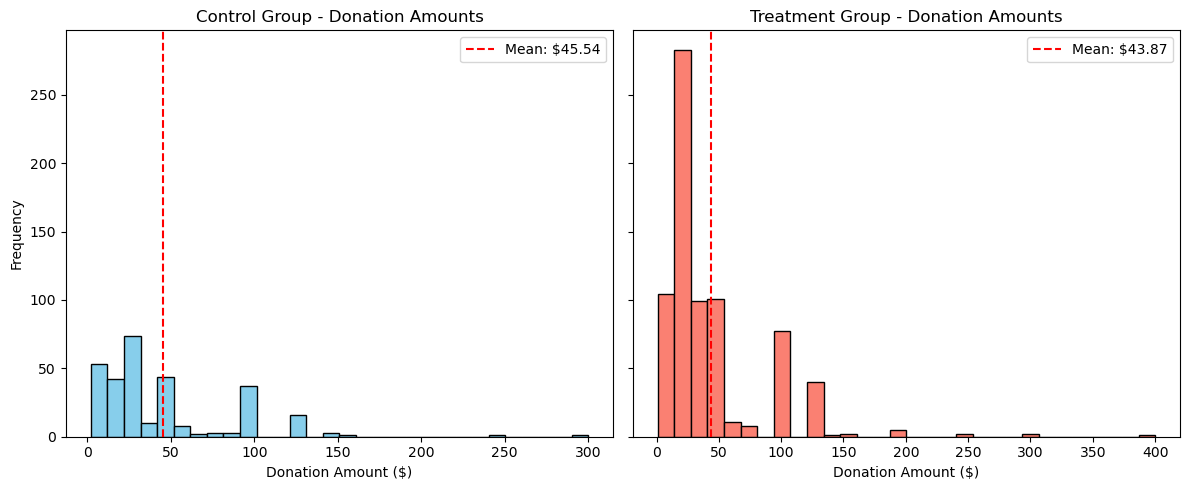

In [35]:
import matplotlib.pyplot as plt


control = df_donors[df_donors['treatment'] == 0]['amount']
treatment = df_donors[df_donors['treatment'] == 1]['amount']

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].hist(control, bins=30, color='skyblue', edgecolor='black')
axes[0].axvline(control.mean(), color='red', linestyle='dashed', label=f'Mean: ${control.mean():.2f}')
axes[0].set_title('Control Group - Donation Amounts')
axes[0].set_xlabel('Donation Amount ($)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].hist(treatment, bins=30, color='salmon', edgecolor='black')
axes[1].axvline(treatment.mean(), color='red', linestyle='dashed', label=f'Mean: ${treatment.mean():.2f}')
axes[1].set_title('Treatment Group - Donation Amounts')
axes[1].set_xlabel('Donation Amount ($)')
axes[1].legend()

plt.tight_layout()
plt.show()


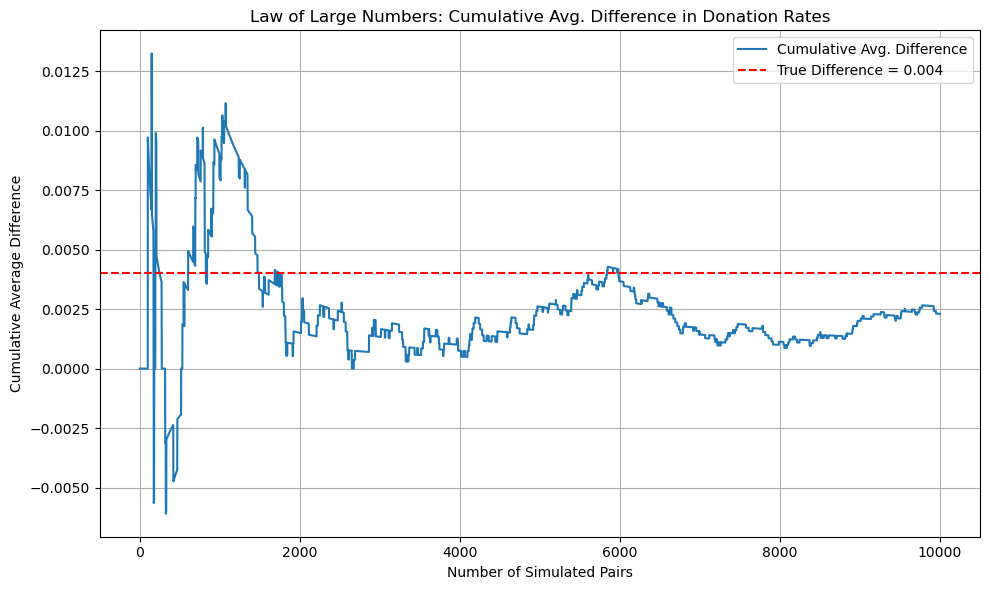

In [36]:
import numpy as np
import matplotlib.pyplot as plt


n = 10000
p_control = 0.018
p_treatment = 0.022
true_diff = p_treatment - p_control

control_draws = np.random.binomial(n=1, p=p_control, size=n)
treatment_draws = np.random.binomial(n=1, p=p_treatment, size=n)

differences = treatment_draws - control_draws

cumulative_avg_diff = np.cumsum(differences) / np.arange(1, n + 1)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_avg_diff, label='Cumulative Avg. Difference')
plt.axhline(true_diff, color='red', linestyle='dashed', label='True Difference = 0.004')
plt.title("Law of Large Numbers: Cumulative Avg. Difference in Donation Rates")
plt.xlabel("Number of Simulated Pairs")
plt.ylabel("Cumulative Average Difference")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This simulation shows how the average difference in donation rates between treatment and control groups stabilizes as the sample size increases. Although early values fluctuate due to randomness, the cumulative average converges to the true difference (0.004) as more data is added. This demonstrates the Law of Large Numbers: with enough observations, sample averages reliably approach their expected values.

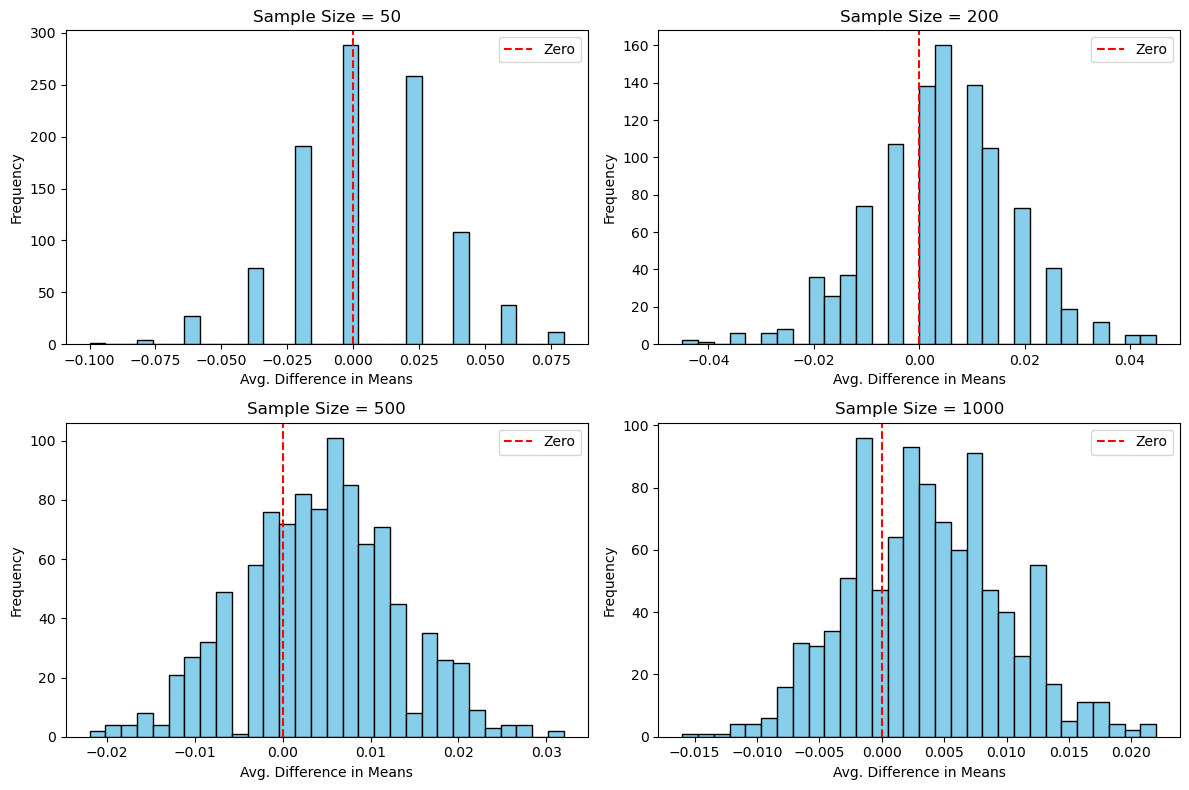

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
control_p = 0.018
treat_p = 0.022
sample_sizes = [50, 200, 500, 1000]
n_simulations = 1000

# Set up plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, n in enumerate(sample_sizes):
    diffs = []
    for _ in range(n_simulations):
        control = np.random.binomial(1, control_p, n)
        treat = np.random.binomial(1, treat_p, n)
        diffs.append(np.mean(treat) - np.mean(control))
    
    # Plot histogram
    axes[i].hist(diffs, bins=30, color='skyblue', edgecolor='black')
    axes[i].axvline(0, color='red', linestyle='dashed', label='Zero')
    axes[i].set_title(f'Sample Size = {n}')
    axes[i].set_xlabel('Avg. Difference in Means')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()


As sample size increases, the distribution of average differences becomes more concentrated and symmetric, illustrating the Central Limit Theorem. With small samples (e.g., 50), the spread is wide and variable. But by n = 1000, the distribution is nearly normal and centered around the true mean difference. Importantly, zero is in the tail, not the center, suggesting that the effect of the treatment is consistently positive across simulations.